# Loan prediction problem

Here we try to predict the loan status by considering various parameters like gender , loan amount etc.
The target varaible has binary classes - Yes and No

The dataset is taken from kaggle
https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [61]:
df = pd.read_excel("train1.xlsx")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Dealing with missing values

In [64]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
#1 first filling up categorical misising values

In [66]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

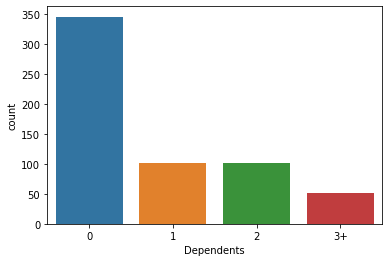

In [67]:
sns.countplot(x ='Dependents', data = df)

In [68]:
#filling with mode make

In [69]:
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])

In [70]:
#2 filling numerical values

In [71]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

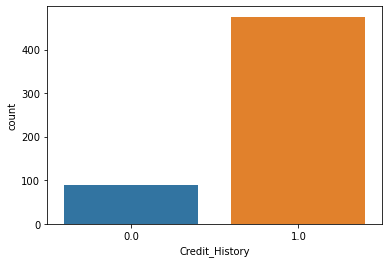

In [72]:
sns.countplot(x ='Credit_History', data = df)

In [73]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

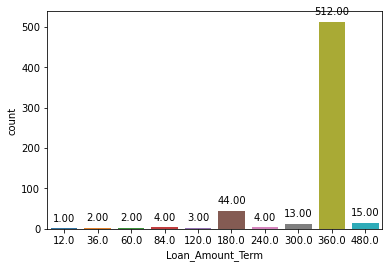

In [74]:
splot = sns.countplot(x ='Loan_Amount_Term', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [75]:
# we can see that 360 has count of 512 so thats why replacing the loan_amount_term by mode will be smarter choice.

In [76]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

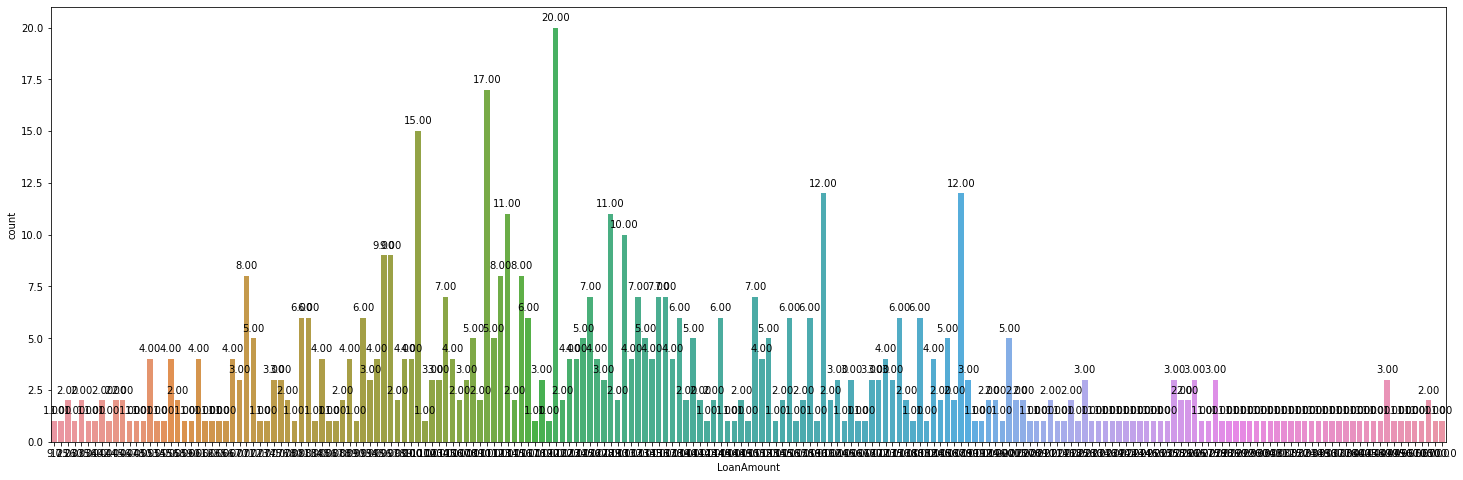

In [77]:
plt.figure(figsize=(25, 8))
splot = sns.countplot(x ='LoanAmount', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [78]:
#replacing with median

<AxesSubplot:xlabel='LoanAmount'>

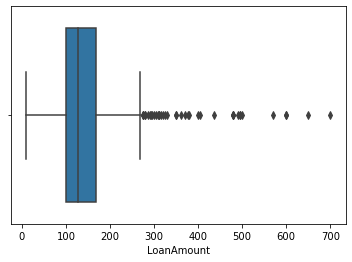

In [79]:
sns.boxplot(x="LoanAmount", data=df)

In [80]:
#we will use median to replace the missing value.
#becuase median is not affected by the outliers.

In [81]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [82]:
df.isnull().sum()
# now there is no missing values.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Checking for data imbalance

The percentage of Y class : 0.69
The percentage of N class : 0.31


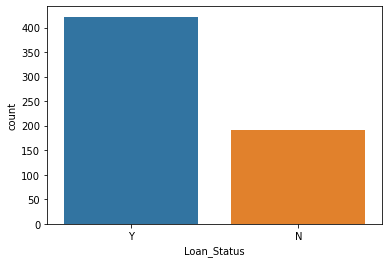

In [83]:
sns.countplot(df['Loan_Status'])
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

#there is almost balance we don't need to worry about that.

#  EDA

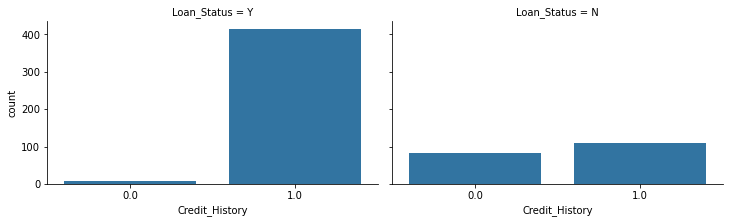

In [84]:
#Credit history vs loan status
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


<AxesSubplot:xlabel='Gender', ylabel='count'>

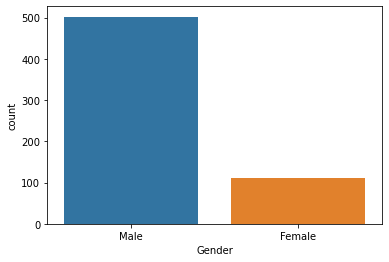

In [85]:
#Gender vs loan status
sns.countplot(x ='Gender', data = df)


<AxesSubplot:xlabel='Married', ylabel='count'>

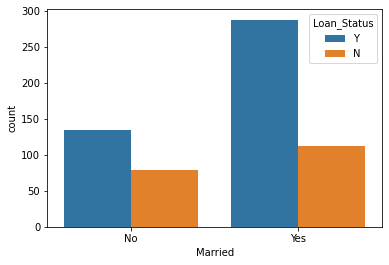

In [86]:
#Married vs loan status
sns.countplot(x='Married', hue='Loan_Status', data=df)

#people who are married have better chance at loan approval

<AxesSubplot:xlabel='Dependents', ylabel='count'>

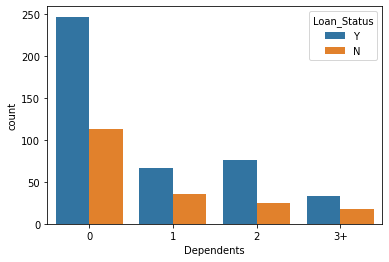

In [87]:
#Dependents vs loan status

sns.countplot(x="Dependents", hue="Loan_Status", data=df)

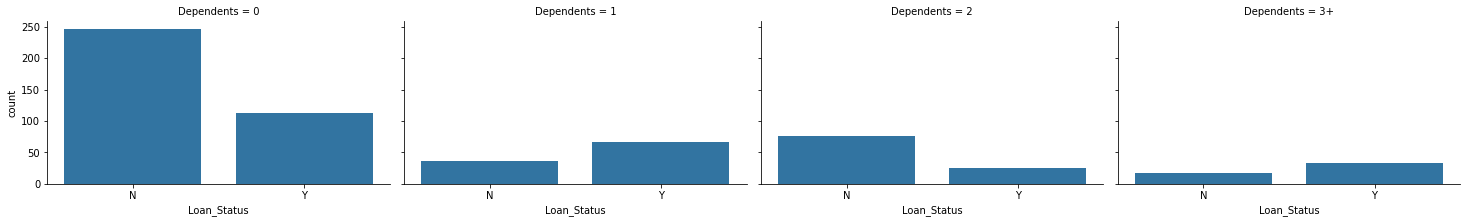

In [88]:
grid = sns.FacetGrid(df,col='Dependents', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')

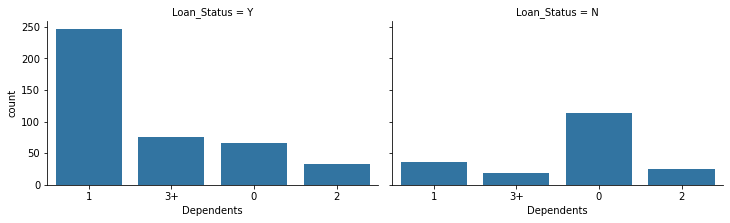

In [89]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Dependents')

#we should drop the dependents as it has no relation with loan status

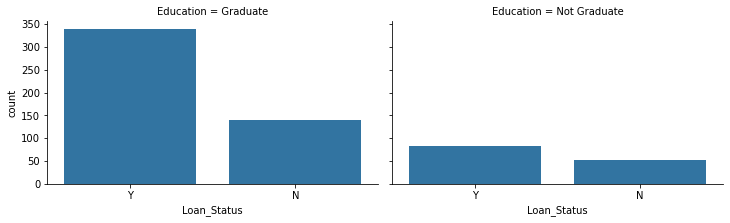

In [90]:
#loan status vs Education
grid = sns.FacetGrid(df,col='Education', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

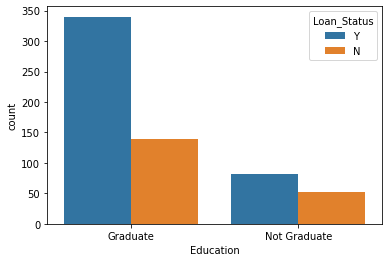

In [91]:
sns.countplot(x="Education", hue="Loan_Status", data=df)
#in both situation people ae getting the loan but people who are graduate are getting loan easier compared to other.

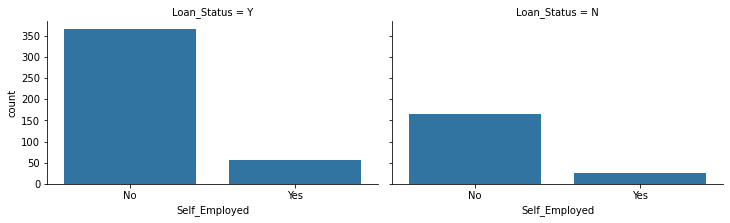

In [92]:
#Self_Employed vs Education
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed')

#people having job got loan easily

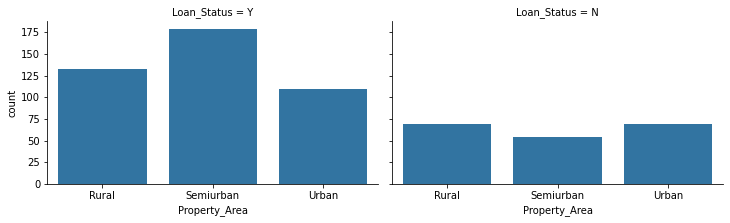

In [93]:
grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Property_Area')

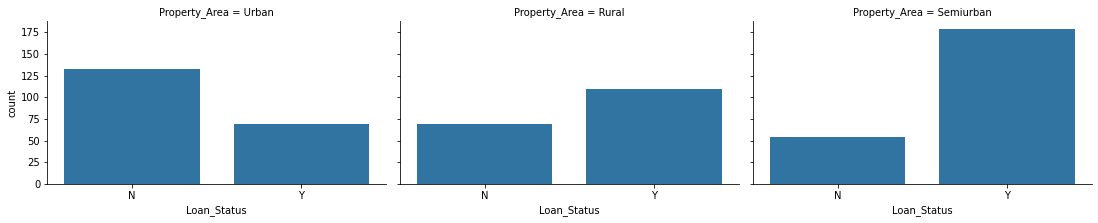

In [94]:
grid = sns.FacetGrid(df,col='Property_Area', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')

# property area has impact on loan status

In [95]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

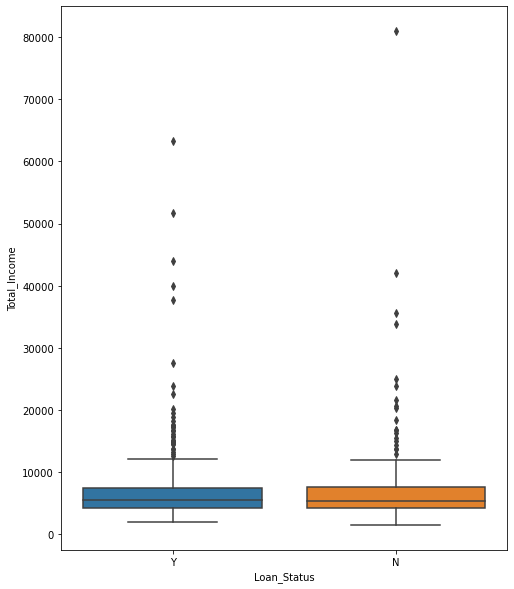

In [96]:
plt.figure(figsize=(8,10))
sns.boxplot(x="Loan_Status",y="Total_Income", data=df)

In [97]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

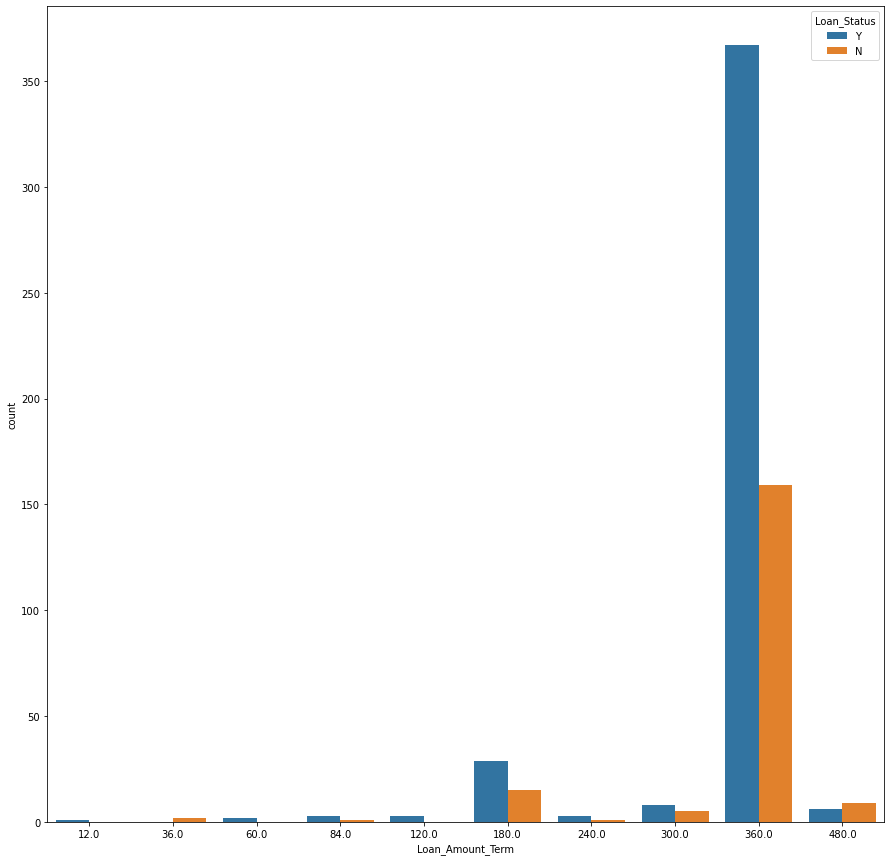

In [98]:
plt.figure(figsize=(15,15))
sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=df)
#no patter

In [99]:
df['LoanAmount'].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

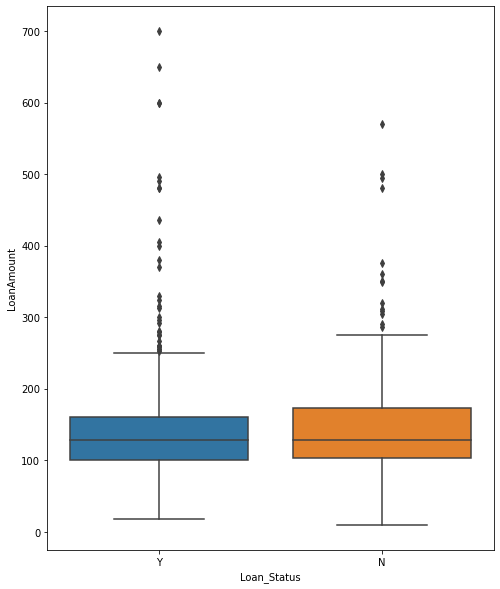

In [100]:
plt.figure(figsize=(8,10))
sns.boxplot(x="Loan_Status",y="LoanAmount", data=df)
#no pattern

# Drop featrues which has no use

In [101]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncome', 'Dependents']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,1.0,Urban,Y
1,Male,Yes,Graduate,No,1.0,Rural,N
2,Male,Yes,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,1.0,Urban,Y
4,Male,No,Graduate,No,1.0,Urban,Y


# Label Encoding for categorical

In [102]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [103]:
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1.0,2,Y
1,1,1,0,0,1.0,0,N
2,1,1,0,1,1.0,2,Y
3,1,1,1,0,1.0,2,Y
4,1,0,0,0,1.0,2,Y


In [104]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [106]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [107]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 75.32467532467533
Cross validation is 78.66719978675197


In [108]:
model = AdaBoostClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [109]:
model =DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 74.67532467532467
Cross validation is 77.52898840463814


In [110]:
model =KNeighborsClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 71.6593362654938


# Confusion matrix

In [111]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[21, 33],
       [ 2, 98]], dtype=int64)

<AxesSubplot:>

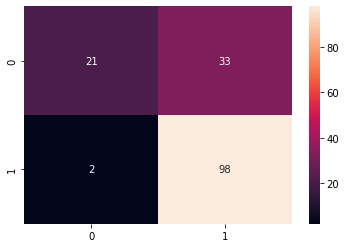

In [112]:
sns.heatmap(cm, annot=True)